# 필기체 분류
1. 모델링

In [1]:
import keras
from keras import models, layers
from keras import backend #딥러닝 엔진들의 함수를 직접 호출 또는 주요 파라미터를 제어

from IPython.display import SVG
from keras.utils.vis_utils import plot_model
%matplotlib inline


class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu')) 
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten()) 
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

Using TensorFlow backend.


2. Data 준비

In [0]:
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

3. 그래프

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [0]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

4. 학습

In [0]:
def main():
    batch_size = 1024
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)
    
    #모델 시각화
    model.summary()

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

5.실행

11493376/11490434 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (

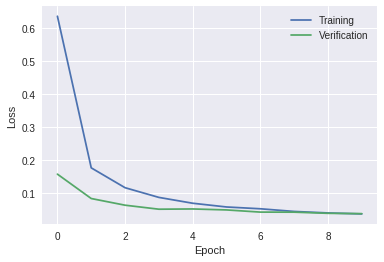

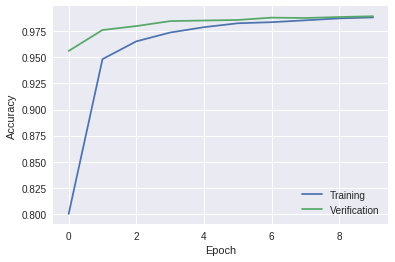

In [7]:
if __name__ == '__main__':
    main()

In [8]:
img = Image.open('model.png')
img.show()


NameError: ignored

# 컬러 이미지 : CIFAR -10

1. 필요한 패키지 임포트

In [0]:
from sklearn import model_selection, metrics # 최적화에 필요한 다양한 툴 제공
from sklearn.preprocessing import MinMaxScaler # 입력값의 크기 조정

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os #파일처리

In [3]:
# 케라스 모델링을 위한 서브패키지
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D,MaxPool2D,Flatten, Dense, Dropout

Using TensorFlow backend.


2. 학습 곡선

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

3. 학습 결과 저장

In [0]:
import datetime
import uuid
import os


def unique_filename(type='uuid'):
    if type == 'datetime':
        filename = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    else:  # type == "uuid"
        filename = str(uuid.uuid4())
    return filename


def makenewfold(prefix='output_', type='datetime'):
    suffix = unique_filename('datetime')
    foldname = 'output_' + suffix
    os.makedirs(foldname)
    return foldname

4. 모델링 : [LeNet](http://blog.naver.com/PostView.nhn?blogId=laonple&logNo=220648539191) 사용

In [0]:
#CNN 클래스를 선언하고 초기화 멤버함수를 만듦
class CNN(Model):
  def __init___(model, nb_classes, in_shape=None):
    model.nb_classes = nb_classes
    model.in_shape=in_shape
    model.build.model()
    super().__init__(model.x,model.y)
    model.compile()
  
  def build_model(model):
    nb_classes = model.nb_classes
    in_shape = model.in_shape
    x=Input(in_shape)
    
    #완전 연결 계층으로 구성된 은닉 계층 두개
    h=Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=in_shae)(x)
    h=Conv2D(64,(3,3),activation='relu')(h)
    
    #3차원 텐서를 1차원 텐서로 변환하는 플랫턴작업
    h=MaxPool2D(Pool_size=(2,2))(h)
    h=Dropout(0.25)(h)
    h= Flatten()(h)
    z_cl = h

    #완전 연결 계층으로 구성된 은닉계층과 출력 계층
    h= Dense(128, activation='relu')(h)
    h = Dropout(0.5)(h)
    z_fl = h
    
    #출력 계층 : nb_classes에 해당하는 노드수, 활성화함수는 소프트 맥스
    y= Dense(nb_classes,activation='softmax',name='preds')(h)
    
    #z_cl과 z_fl을 이용해 부가적인 2가지 모델을 만듦
    model.cl_part = Model(x,z_cl)
    model.fl_part = Model(x,z_fl)
    
    #본 모델을 만들 수 있도록 입력과 출력을 멤버 변수로 정의
    
    model.x, model.y = x,y
    

학습때 gpu 사용하도록하기

In [0]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

5. 데이터 준비

In [0]:
class Dataset(): 
  def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
    #입력과 출력변수로 X, y를 입력받고, y에 대한 클래스 수를 nb_classes로 제공받음
    #나머지 초기화 어규먼트인 scaling은 True, test_size=0.2, random_state=0으로 고정
    #입력값인 X를 멤버 변수로 지정한 후 채널 정보를 추가함
    self.X = X
    self.add_channels()
    
    X = self.X
    
    #이제 채널이 추가된 X와 목표값y전체에서 학습과 검증에 사용할 데이터를 분리
    #데이터를 혼합(suffle)한 후 80%는 학습 데이터, 20%는 검증 데이터
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=random_state)
    
    #이미지 데이터가 정수인 경우가 있으니 32비트 규격 실수로 바꾸자
    X_train =X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    #scaling이 True인 경우 임지의 최댓값이 최솟값이 특정한 값(0과 1사이가 되도록)이 되도록 스케일링시키자
    
    if scaling:
      scaler = MinMaxScaler()
      n = X_train.shape[0]
      X_train = scaler.fit_transform(X_train.reshape(n,-1)).reshape(X_train.shape) #스케일링 기준
      n = X_test.shape[0]
      X_test = scaler.transform(X_test.reshape(n,-1)).reshape(X_test.shape)
      slef.scaler = scaler
      
    #출력(정수값)을 nb_class만큼 이진 원소를 가진 벡터로
    Y_train =np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    
    #학습과 검증에 사용할 데이터들을 멤버 변수로 등록
    self.X_train, self.X_test = X_train, X_test
    self.Y_train, self.Y_test = Y_train, Y_test
    self.y_train, self.y_test = y_train, y_test
    
    #Dataset 클래스의 인스턴스를 활용해 학습 및 검증 데이터를 자유롭게 사용가능
  
  #채널 정보를 데이터에 포함시키는 과정
    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]  # channel is already included.

        self.X = X
        self.input_shape = input_shape

6. 평가 머신 클래스 구현

In [0]:
class Machine():
  def __init__(self,X,y,nb_classes=2,fig=True):
    self.nb_classes = nb_classes
    self.set_data(X,y)
    self.set_model()
    self.fig = fig()
  def set_data(self, X,y): #데이터 지정
    nb_classes = self.nb_classes
    self.data = Dataset(X,y,nb_classes)
  def set_model(self): #모델을 설정
    nb_classes = self.nb_classes
    data = self.data
    self.model = CNN(nb_classes=nb_classes,in_shape=data.input_shape)
  def fit(self, nb_epoch=10, batch_size=128, verbose=1): #학습 진행할 멤버 함수
    data = self.data
    model = self.model
    history = model.fit(data.X_train, data.Y_train, batch_size = batch_size, epochs=nb_epoch, verbose = verbose, validation_data=(data.X_test, data.Y_test))
    return history

7. 모델 설정